Тема “Обучение с учителем”

In [1]:
# Задание 1
# Импортируйте библиотеки pandas и numpy.
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn..
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью
# функции train_test_split так, чтобы размер тестовой выборки
# составлял 30% от всех данных, при этом аргумент random state должен быть равен 42.
# Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля
# sklearn.linear_model.
# Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на
# тестовых.

In [2]:
# Загружаем необходимые библиотеки
# !pip install pandas
# !pip install matplotlib
# !pip install numpy
# !pip install scikit-learn
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Загружаем датасет Boston
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# Название фичей
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
# Преобразуем его в датафрейм
# Фичи
X = pd.DataFrame(data, columns=feature_names)
# Таргет
y = pd.DataFrame(target, columns=['price'])

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [9]:
# Разбиваем выборку на тренировочную 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [10]:
# Линейная регрессия
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# Обучим модель
lr.fit(X_train, y_train)
# Выполним predict
y_pred_linear = lr.predict(X_test)
# Посмотрим реальные и предсказанные значения
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred_linear.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [11]:
# Посмотрим, какие коэффициенты подобрала наша модель на этапе обучения.  
# Свободный коэффициент хранится в атрибуте .intercept_:
lr.intercept_

array([31.63108404])

In [12]:
# Остальные коэффициенты хранятся в атрибуте .coef_:
lr.coef_

array([[-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
         3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
        -1.08208352e-02, -1.38599824e+00,  2.42727340e-01,
        -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01]])

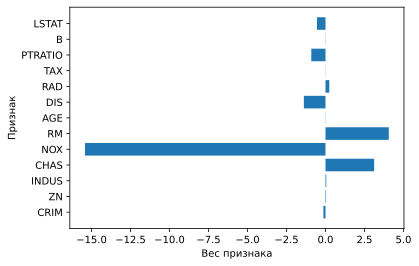

In [13]:
# Визуализируем вклад каждого из этих коэффициентов
from matplotlib import pyplot as plt
# Отображаем графики прямо в ноутбуке с более четким отображением, а не в отдельном окне
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# Задаем размер фигуры
plt.rcParams['figure.figsize'] = 6, 4
# Задаём данные для отрисовки
plt.barh(feature_names, lr.coef_.flatten())
# Подписываем оси
plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [14]:
# Задание 2
#Создайте модель под названием model с помощью класса RandomForestRegressor из модуля
# sklearn.ensemble.
# Сделайте агрумент n_estimators равным 1000,
# max_depth должен быть равен 12 и random_state сделайте равным 42.
# Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
# но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
# чтобы получить из датафрейма одномерный массив Numpy,
# так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно
# применение массивов вместо датафрейма.
# Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из
# предыдущего задания.
# Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Создадим модель с агрумент n_estimators 1000, с max_depth  12, random_state 42
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
# Обучим модель
model.fit(X_train, y_train.values[:, 0])
# Выполним predict
y_pred_random_forest = model.predict(X_test)
# Подсчитаем предсказания на тестовых данных и вычислим коэффициент R2
from sklearn.metrics import r2_score

# Оценим предсказания по метрике R2 для модели RandomForestRegressor
r2_score(y_test, y_pred_random_forest)

0.87472606157312

In [16]:
# Оценим предсказания по метрике R2 для модели LinearRegression
r2_score(y_test, y_pred_linear)

0.7112260057484903

In [ ]:
# Вывод:
# Рандомная модель регресии предсказывает лучше, чем линейная модель регресии.